*Luis Anton P. Imperial*  
*BCS32*

# Customer Churn

**Subject:** S-CSIS311LA – Introduction to Machine Learning (Laboratory)  
**Date:** Wednesday, September 25, 2024

In [318]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [319]:
# from google.colab import drive

# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [342]:
# Move dataset from Google Drive to GitHub
dataset_source = "https://raw.githubusercontent.com/LuisAPI/notebooks/refs/heads/main/data/telco-complete.csv"

dataset = pd.read_csv(dataset_source)

In [343]:
dataset

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78.000000,No,Yes,No,No,0.000000,United States,California,...,20.000000,0.000000,59.650000,3.000000,Churned,Yes,91.000000,5433.000000,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74.000000,No,Yes,Yes,Yes,1.000000,United States,California,...,0.000000,390.800000,1024.100000,3.000000,Churned,Yes,69.000000,5302.000000,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71.000000,No,Yes,No,Yes,3.000000,United States,California,...,0.000000,203.940000,1910.880000,2.000000,Churned,Yes,81.000000,3179.000000,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78.000000,No,Yes,Yes,Yes,1.000000,United States,California,...,0.000000,494.000000,2995.070000,2.000000,Churned,Yes,88.000000,5337.000000,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80.000000,No,Yes,Yes,Yes,1.000000,United States,California,...,0.000000,234.210000,3102.360000,2.000000,Churned,No,67.000000,2793.000000,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10038,4644-PIZRT,Male,54.287261,Yes,No,No,Yes,6.097552,United States,California,...,139.346879,2836.075459,2182.719600,2.457598,Stayed,No,73.208744,3386.085702,Dissatisfaction,Extra data charges
10039,1809-DMJHQ,Female,43.096943,No,Yes,No,Yes,6.258545,United States,California,...,5.863603,204.226375,6547.731644,2.211535,Joined,No,40.634987,3873.472414,NaN,Moved
10040,2834-JKOOW,Male,29.657363,Yes,Yes,Yes,Yes,3.998771,United States,California,...,95.482960,3332.440967,2866.489661,2.500703,Churned,Yes,21.389367,5023.841914,Attitude,Moved
10041,0839-JTCUD,Female,51.111013,No,Yes,Yes,No,5.898429,United States,California,...,102.561536,495.945122,6731.431927,2.083251,Joined,No,69.138707,4367.561598,NaN,NaN


## Data Preprocessing

### Importing the dataset

We will assign to the `X` variable:

1. all rows (`:`), with
2. their corresponding values in:
 - `Age`,
 - `AccountLength`,
 - `ServiceUsage`,
 - `PaymentMethod`.

We will assign to the `y` variable:

1. all rows (`:`), with
2. the `Churn Label`,
 - replaced first from `Yes` and `No` strings into 1s and 0s.

### Converting categorical values to numeric ones

Our training models cannot accept by themselves data passed on as strings, so we have to replace them with numerical equivalents.

#### Conversion of Churn Label values

Former Value | New Value
-----|-----
Yes | 1
No | 0

In [322]:
dataset['Churn Label'] = dataset['Churn Label'].replace({'Yes': 1, 'No': 0})

<ipython-input-322-4e36ad1ec42c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Churn Label'] = dataset['Churn Label'].replace({'Yes': 1, 'No': 0})


#### Conversion of PaymentMethod values

Former Value | New Value
-----|-----
Bank Withdrawal | 0
Credit Card | 1
Mailed Check | 2

In [323]:
dataset['PaymentMethod'] = dataset['PaymentMethod'].replace({'Bank Withdrawal': 0, 'Credit Card': 1, 'Mailed Check': 2})


<ipython-input-323-3b8eeffc87e7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['PaymentMethod'] = dataset['PaymentMethod'].replace({'Bank Withdrawal': 0, 'Credit Card': 1, 'Mailed Check': 2})


#### Conversion of letters in Customer ID to numbers



In [324]:
def convert_alphanumeric_id(customer_id):
  """Converts alphanumeric ID to a numeric ID, handles purely numeric IDs, and removes hyphens.
  """
  if not isinstance(customer_id, int):
    customer_id = customer_id.replace('-', '')  # Remove hyphens
  if isinstance(customer_id, int):
    return int(customer_id)
  else:
    numeric_id = ''
    for char in customer_id:
      if char.isalpha():
        numeric_id += str(ord(char.upper()) - 64).zfill(2)
      else:
        numeric_id += char
    return int(numeric_id)

# Apply the function to the 'Customer ID' column
dataset['Customer ID'] = dataset['Customer ID'].apply(convert_alphanumeric_id)

#### Assigning dataset columns to X and y variables

In [325]:
X = dataset[['Customer ID', 'Age', 'AccountLength', 'ServiceUsage', 'PaymentMethod']].values
# For testing purposes:
# X = dataset[['Age', 'AccountLength', 'ServiceUsage']].values
y = dataset['Churn Label'].values

## Data Splitting

__Splitting the dataset into the training set and the test set__ is a core part of the process of creating a prediction machine.

### Getting Started with Data Splitting

We will be importing the incredibly useful `train_test_split` function from the `model_selection` package of SciKit Learn.

#### Assignment of Returned Elements from TTS

This function will output four elements, which we will respectively assign to `X_train`, `X_test`, `y_train` and `y_test`.

#### Chosen Test Size

We chose **25%** of the data set as our test size.

In [326]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
#We get the same train and test sets across different executions

In [327]:
print(X_train)

[[5.57814110e+13 2.00000000e+01 5.80000000e+01 5.84665000e+03
  1.00000000e+00]
 [5.67603061e+13 3.00000000e+01 7.10000000e+01 5.15450000e+03
  1.00000000e+00]
 [6.72804112e+13 2.50000000e+01 7.20000000e+01 7.30305000e+03
  0.00000000e+00]
 ...
 [8.31101409e+12 5.20000000e+01 7.10000000e+01 1.39625000e+03
  1.00000000e+00]
 [5.29323241e+13 6.06236504e+01 3.25486520e+01 7.43648045e+03
  0.00000000e+00]
 [8.95121318e+12 3.40000000e+01 2.30000000e+01 1.50980000e+03
  0.00000000e+00]]


In [328]:
print(y_train)

[0 0 0 ... 0 0 1]


In [329]:
print(X_test)

[[8.80010152e+13 5.60000000e+01 1.20000000e+01 9.66550000e+02
  0.00000000e+00]
 [7.20910032e+13 3.73417722e+01 5.66784360e+01 5.76212567e+03
  0.00000000e+00]
 [5.21512141e+13 2.00000000e+01 7.00000000e+00 1.49050000e+02
  0.00000000e+00]
 ...
 [7.54913251e+13 4.80000000e+01 6.30000000e+01 6.21535000e+03
  0.00000000e+00]
 [5.30107012e+13 3.10000000e+01 3.20000000e+01 2.59615000e+03
  0.00000000e+00]
 [3.78514181e+13 4.00000000e+01 1.00000000e+00 1.96500000e+01
  1.00000000e+00]]


In [330]:
print(y_test)

[1 0 1 ... 0 0 1]


## Choosing K Value

This is the third step in training a predictive model for customer churn.

We will initially choose the **K-value** of 40, a nice round number that can capture the complexity of the data set we have acquired regarding this telecommunications company.

### Coming to Terms with our Chosen Value

According to [a user on the Stack Overflow forum](https://stackoverflow.com/a/38965928), "a general rule of thumb in choosing the value of **k** is **k = sqrt(N)/2**, where **N** stands for the **number of samples in your training dataset**."

#### **How Not to Get K**

There are 10,043 rows of customers in our data set, and typing `sqrt(7043)/2` into a calculator yields `50.1073846853`.

We can round this down by the tens place to simply `50`.

*But wait!*

There aren't 10,043 customers *in our training set*.

#### **How We Got K**

When we invoked the `train_test_split` function earlier, we configured the `test_size` to `0.25`, meaning only 75% of the dataset is for training purposes.

10,043 * 0.75 = 7532.25

sqrt(7532.25)/2 = 43.3942680547 = `40`

#### **Our Chosen Value of K**

K = 40.

In [331]:
k = 40

## Model Training

### Feature Scaling

We will be importing the `StandardScaler` function from SciKit-Learn to transform and fit our `X_train` and `X_test` variables.

In [332]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [333]:
print(X_train)

[[ 0.21000361 -1.62039369  1.03436372  1.18053301  0.50249701]
 [ 0.24424447 -1.03168907  1.58586038  0.90539946  0.50249701]
 [ 0.61222821 -1.32604138  1.62828319  1.75946025 -0.91185557]
 ...
 [-1.45046786  0.2634611   1.58586038 -0.58852619  0.50249701]
 [ 0.11034513  0.77113938 -0.04535421  1.81249961 -0.91185557]
 [-1.42807427 -0.79620722 -0.45043495 -0.54338942 -0.91185557]]


#### Shapes of Newly-Trained Data

As seen below, the dataset has:

- 2 dimensions, with each D consisting of:
 - 7,532 elements, with
 - 4 values within.

The latter is applicable only to the X set of variables, as we imported 4 columns worth of data onto them.

##### **Where Did That 7K Number Come From?**

Remember from the *Data Splitting* heading that we used the `train_test_split` function to split our data into a training set and a testing set.

The `test_size` variable was set to `0.25`, meaning 25% of the data is for testing, while the remaining 75% remains as training data.

10,043 * 0.75 = 7,532.25

Therefore, the training data consists of 7,532 customers.

In [334]:
print(X_train.shape)
print(y_train.shape)

(7532, 5)
(7532,)


### Training the K-NN model on the Training Set

Using the declared K-value in the previous section, we will be importing the classifier function for the K Nearest Neighbors form of training.

Both training data will be fit with the classifier we have configured.

In [335]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

### Predicting the Test Set Results

In [336]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1 ))

[[1 1]
 [0 0]
 [1 1]
 ...
 [0 0]
 [1 0]
 [1 1]]


## Model Evaluation



### Accuracy, Recall, Precision, F-1

In [337]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(y_test, y_pred):
  # Compute the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(cm)

  # Compute accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)

  # Compute precision
  precision = precision_score(y_test, y_pred)
  print("Precision:", precision)

  # Compute recall
  recall = recall_score(y_test, y_pred)
  print("Recall:", recall)

  # Compute F1-score
  f1 = f1_score(y_test, y_pred)
  print("F1-score:", f1)

compute_metrics(y_test, y_pred)

Confusion Matrix:
[[1432   32]
 [  24 1023]]
Accuracy: 0.9776981282357626
Precision: 0.9696682464454977
Recall: 0.9770773638968482
F1-score: 0.9733587059942912


<ipython-input-338-e9bc2e1fdf37>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_points[:, 0], data_points[:, 1], c=ListedColormap(('red', 'green'))(i), label=label)


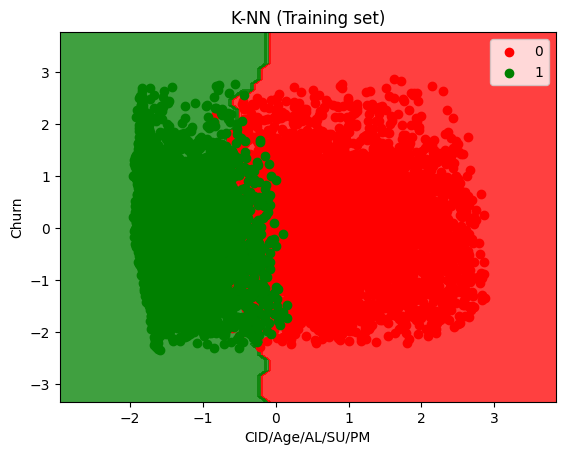

In [338]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_reduced = pca.fit_transform(X_train)

# Create a new scaler for the reduced data
sc_reduced = StandardScaler()
X_reduced = sc_reduced.fit_transform(X_reduced)

# Plot using X_reduced for the first two principal components

from matplotlib.colors import ListedColormap
X_set, y_set = sc_reduced.inverse_transform(X_reduced), y_train # Use the new scaler here
# Generate a meshgrid with the same dimensionality as the reduced data
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))


# Train a new classifier on the reduced data
classifier_reduced = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_reduced.fit(X_reduced, y_train)

# Predict using the classifier and reshape to match the meshgrid
Z = classifier_reduced.predict(sc_reduced.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)

# Plot the filled contours
plt.contourf(X1, X2, Z,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

unique_labels = np.unique(y_set)  # Get unique labels
unique_labels = unique_labels.reshape(-1, 1)  # Reshape to match column shape

for i, label in enumerate(np.unique(y_set)):
    # Use indexing to select rows with matching labels
    data_points = X_set[y_set == label]
    plt.scatter(data_points[:, 0], data_points[:, 1], c=ListedColormap(('red', 'green'))(i), label=label)
    plt.title('K-NN (Training set)')
    plt.xlabel('CID/Age/AL/SU/PM')
    plt.ylabel('Churn')
    plt.legend()
plt.show()

In [340]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv=5) # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.56197113 0.54405177 0.54554505 0.5189243  0.51344622]
Average cross-validation score: 0.5367876924358317
